In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"C:\Users\Sachin's World\OneDrive\Documents\MIT\MentorMind\2nd_term\Train_data.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [4]:
data.dropna(inplace=True)
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
cat_col=['department','region', 'education', 'gender', 'recruitment_channel','previous_year_rating']
for i in cat_col:
    data[i]=le.fit_transform(data[i])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   employee_id           48660 non-null  int64
 1   department            48660 non-null  int32
 2   region                48660 non-null  int32
 3   education             48660 non-null  int32
 4   gender                48660 non-null  int32
 5   recruitment_channel   48660 non-null  int32
 6   no_of_trainings       48660 non-null  int64
 7   age                   48660 non-null  int64
 8   previous_year_rating  48660 non-null  int64
 9   length_of_service     48660 non-null  int64
 10  KPIs_met >80%         48660 non-null  int64
 11  awards_won?           48660 non-null  int64
 12  avg_training_score    48660 non-null  int64
 13  is_promoted           48660 non-null  int64
dtypes: int32(5), int64(9)
memory usage: 4.6 MB


In [10]:
#deviding the data into predictors and outcome variables
x=data.iloc[:,:-1]
y=data['is_promoted']

In [11]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [12]:
#checking out the dimentions of training and testing samples
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38928, 13), (9732, 13), (38928,), (9732,))

# firstly we are checking model accuracy without using  variable scaling 

# 1)XGBoost

In [13]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

[14:19:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_predict= model_xgb.predict(x_test)

In [61]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))

0.93711467324291


In [62]:
print('Confusion matrix:\n',confusion_matrix(y_test,y_predict))
print()
print('Classification Report:\n',classification_report(y_test,y_predict))

Confusion matrix:
 [[8813   52]
 [ 560  307]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8865
           1       0.86      0.35      0.50       867

    accuracy                           0.94      9732
   macro avg       0.90      0.67      0.73      9732
weighted avg       0.93      0.94      0.92      9732



XGBoost  algorithm has giving accuacy of 94% before scaling the variable

# 2)Catboost algorithm without scaling

In [63]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()
model_cat.fit(x_train,y_train)

Learning rate set to 0.049201
0:	learn: 0.6372223	total: 10.9ms	remaining: 10.9s
1:	learn: 0.5906530	total: 20.2ms	remaining: 10.1s
2:	learn: 0.5416303	total: 30.5ms	remaining: 10.1s
3:	learn: 0.5066185	total: 42ms	remaining: 10.4s
4:	learn: 0.4643017	total: 54.5ms	remaining: 10.8s
5:	learn: 0.4398090	total: 67.2ms	remaining: 11.1s
6:	learn: 0.4123727	total: 79.9ms	remaining: 11.3s
7:	learn: 0.3939143	total: 92.2ms	remaining: 11.4s
8:	learn: 0.3774850	total: 104ms	remaining: 11.4s
9:	learn: 0.3620434	total: 115ms	remaining: 11.4s
10:	learn: 0.3409093	total: 128ms	remaining: 11.5s
11:	learn: 0.3302988	total: 142ms	remaining: 11.7s
12:	learn: 0.3195835	total: 156ms	remaining: 11.8s
13:	learn: 0.3063199	total: 170ms	remaining: 12s
14:	learn: 0.2992577	total: 184ms	remaining: 12.1s
15:	learn: 0.2927734	total: 195ms	remaining: 12s
16:	learn: 0.2844318	total: 209ms	remaining: 12.1s
17:	learn: 0.2747271	total: 225ms	remaining: 12.3s
18:	learn: 0.2708574	total: 241ms	remaining: 12.4s
19:	learn

In [64]:
y_predict1 = model_cat.predict(x_test)

In [66]:

print(accuracy_score(y_test,y_predict1))
print(classification_report(y_test,y_predict1))

0.9398890258939581
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8865
           1       0.93      0.35      0.51       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.74      9732
weighted avg       0.94      0.94      0.93      9732



CATBoost  algorithm has giving accuacy of 94% before scaling the variable smiilar to XGBoost algorithm

# 3)LightGBM without scaling

In [67]:
from lightgbm import LGBMClassifier
model_light = LGBMClassifier()
model_light.fit(x_train,y_train)

LGBMClassifier()

In [68]:
y_predict2 = model_light.predict(x_test)

In [69]:

print(accuracy_score(y_test,y_predict2))
print(classification_report(y_test,y_predict2))

0.938964241676942
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8865
           1       0.93      0.34      0.50       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.73      9732
weighted avg       0.94      0.94      0.93      9732



LightGBM  algorithm has giving accuacy of 94% before scaling the variable smiilar to XGBoost and CATboost algorithm

# Normalization (MinMax Scaling)

Now I have applying normalization(MinMax) scaling to  model  in order to check whether the accuracy of model will increase or not?

In [15]:
from sklearn.preprocessing import MinMaxScaler
Min=MinMaxScaler()

In [17]:
data_norm=Min.fit_transform(data)
data_norm

array([[0.8357536 , 0.875     , 0.93939394, ..., 0.        , 0.16666667,
        0.        ],
       [0.83196036, 0.5       , 0.42424242, ..., 0.        , 0.35      ,
        0.        ],
       [0.09594237, 0.875     , 0.3030303 , ..., 0.        , 0.18333333,
        0.        ],
       ...,
       [0.95266741, 0.5       , 0.57575758, ..., 0.        , 0.28333333,
        0.        ],
       [0.17774627, 0.        , 0.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.65807119, 0.25      , 0.42424242, ..., 0.        , 0.16666667,
        0.        ]])

In [18]:
data_norm_df=pd.DataFrame(data_norm,columns=data.columns)
data_norm_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.835754,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667,0.0
1,0.831960,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000,0.0
2,0.095942,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333,0.0
3,0.032453,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333,0.0
4,0.625107,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,0.088305,0.875,0.151515,0.0,1.0,0.0,0.111111,0.275,0.00,0.027778,0.0,0.0,0.166667,0.0
48656,0.038686,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000,0.0
48657,0.952667,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333,0.0
48658,0.177746,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667,0.0


In [19]:
#deviding the data into predictors and outcome variables
x=data_norm_df.iloc[:,:-1]
y=data_norm_df['is_promoted']

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38928, 13), (9732, 13), (38928,), (9732,))

# A trained model which can predict the employee performance based on factors as inputs

# 1)Logistic Regression

In [22]:
#importing the logistic regression classification,training and predicting for test samples 
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1_fit=model1.fit(x_train,y_train)
y_predict1=model1_fit.predict(x_test)

In [23]:
#importing classification metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print('Accuracy Score:',accuracy_score(y_test,y_predict1))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y_predict1))
print()
print('Classification Report:\n',classification_report(y_test,y_predict1))

Accuracy Score: 0.9146115906288532

Confusion matrix:
 [[8835   30]
 [ 801   66]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      8865
         1.0       0.69      0.08      0.14       867

    accuracy                           0.91      9732
   macro avg       0.80      0.54      0.55      9732
weighted avg       0.90      0.91      0.88      9732



# 1)XGBOOST Classifier

In [27]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

[21:24:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
# Predicting the model
y_predict_xgb = model_xgb.predict(x_test)

In [29]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.93711467324291
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      8865
         1.0       0.86      0.35      0.50       867

    accuracy                           0.94      9732
   macro avg       0.90      0.67      0.73      9732
weighted avg       0.93      0.94      0.92      9732



we can clearly seen that even after applying Normalization scaling to model and further using XGBoost algorithm accuracy dosent get affected it is still remain as 94%


# 2) CatBoost

In [30]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()
model_cat.fit(x_train,y_train)

Learning rate set to 0.049201
0:	learn: 0.6372223	total: 136ms	remaining: 2m 15s
1:	learn: 0.5906530	total: 147ms	remaining: 1m 13s
2:	learn: 0.5416303	total: 158ms	remaining: 52.6s
3:	learn: 0.5066185	total: 169ms	remaining: 42.1s
4:	learn: 0.4643017	total: 181ms	remaining: 36s
5:	learn: 0.4398090	total: 194ms	remaining: 32.1s
6:	learn: 0.4123727	total: 204ms	remaining: 29s
7:	learn: 0.3939143	total: 214ms	remaining: 26.6s
8:	learn: 0.3774850	total: 224ms	remaining: 24.6s
9:	learn: 0.3620434	total: 232ms	remaining: 23s
10:	learn: 0.3409093	total: 242ms	remaining: 21.7s
11:	learn: 0.3302988	total: 251ms	remaining: 20.7s
12:	learn: 0.3195835	total: 260ms	remaining: 19.8s
13:	learn: 0.3063199	total: 272ms	remaining: 19.1s
14:	learn: 0.2992577	total: 281ms	remaining: 18.5s
15:	learn: 0.2927734	total: 291ms	remaining: 17.9s
16:	learn: 0.2844318	total: 303ms	remaining: 17.5s
17:	learn: 0.2747271	total: 315ms	remaining: 17.2s
18:	learn: 0.2708574	total: 326ms	remaining: 16.8s
19:	learn: 0.26

In [31]:
y_predict_cat = model_cat.predict(x_test)

In [32]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_cat))
print(classification_report(y_test,y_predict_cat))

0.9398890258939581
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8865
         1.0       0.93      0.35      0.51       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.74      9732
weighted avg       0.94      0.94      0.93      9732



we can clearly seen that even after applying Normalization scaling to model and further using CATBoost algorithm accuracy dosent get affected it is still remain as 94%

# 3)LightGBM

In [33]:
from lightgbm import LGBMClassifier
model_light = LGBMClassifier()
model_light.fit(x_train,y_train)

LGBMClassifier()

In [34]:
y_predict_light = model_light.predict(x_test)

In [35]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_light))
print(classification_report(y_test,y_predict_light))

0.939272503082614
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8865
         1.0       0.94      0.34      0.50       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.73      9732
weighted avg       0.94      0.94      0.93      9732



we can clearly seen that even after applying Normalization scaling to model and further usig LIGHTGBM algorithm accuracy dosent get affected it is still remain as 94%

# standardization

Now I have applying standardization scaling to  model  

In [14]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
data_scale=SC.fit_transform(data)
data_scale

array([[ 1.16078049,  0.81953619,  1.76864504, ..., -0.15391006,
        -1.10019636, -0.30863448],
       [ 1.14765645, -0.38798019, -0.15845292, ..., -0.15391006,
        -0.2714691 , -0.30863448],
       [-1.39884893,  0.81953619, -0.61188773, ..., -0.15391006,
        -1.02485752, -0.30863448],
       ...,
       [ 1.56528369, -0.38798019,  0.4083406 , ..., -0.15391006,
        -0.57282447, -0.30863448],
       [-1.11582042, -1.99800204, -1.74547477, ..., -0.15391006,
         1.15996889, -0.30863448],
       [ 0.54602754, -1.19299112, -0.15845292, ..., -0.15391006,
        -1.10019636, -0.30863448]])

In [15]:
data_scale_df=pd.DataFrame(data_scale,columns=data.columns)
data_scale_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1.160780,0.819536,1.768645,1.504367,-1.511973,1.153668,-0.416526,-0.078232,1.321617,0.401556,1.343599,-0.15391,-1.100196,-0.308634
1,1.147656,-0.387980,-0.158453,-0.672141,0.661388,-0.885693,-0.416526,-0.741846,1.321617,-0.549756,-0.744270,-0.15391,-0.271469,-0.308634
2,-1.398849,0.819536,-0.611888,-0.672141,0.661388,1.153668,-0.416526,-0.210955,-0.268323,0.163728,-0.744270,-0.15391,-1.024858,-0.308634
3,-1.618511,0.819536,-0.045094,-0.672141,0.661388,-0.885693,1.236399,0.452660,-1.858262,0.877213,-0.744270,-0.15391,-1.024858,-0.308634
4,0.431977,1.222042,0.294982,-0.672141,0.661388,-0.885693,-0.416526,1.248997,-0.268323,-1.025413,-0.744270,-0.15391,0.707936,-0.308634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,-1.425274,0.819536,-1.178681,-0.672141,0.661388,-0.885693,1.236399,-0.609123,-1.858262,-1.025413,-0.744270,-0.15391,-1.100196,-0.308634
48656,-1.596947,1.222042,-1.178681,-0.672141,0.661388,1.153668,-0.416526,1.647166,-0.268323,2.542010,-0.744270,-0.15391,1.084630,-0.308634
48657,1.565284,-0.387980,0.408341,1.504367,-1.511973,-0.885693,-0.416526,0.187214,-1.063293,-0.074100,-0.744270,-0.15391,-0.572824,-0.308634
48658,-1.115820,-1.998002,-1.745475,-0.672141,0.661388,-0.885693,-0.416526,-1.140015,1.321617,-0.787585,1.343599,-0.15391,1.159969,-0.308634


In [19]:
#dividing the data into predictors and outcome variables
x_scale=data_scale_df.iloc[:,:-1]
y_scale=data_scale_df['is_promoted']

In [20]:
 x_train_scale, x_test_scale, y_train_scale, y_test_scale = train_test_split( x_scale, y_scale, test_size=0.20, random_state=42)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38928, 13), (9732, 13), (38928,), (9732,))

In [25]:
y_test_scale.value_counts()

-0.308634    8865
 3.240079     867
Name: is_promoted, dtype: int64

# Robust Scaling Technique

Now I have applying Robust  scaling to  model  

In [8]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
data_robust=RS.fit_transform(data)
data_robust

array([[ 0.67008713,  0.66666667,  1.7       , ...,  0.        ,
        -0.44      ,  0.        ],
       [ 0.66251538, -0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.80665906,  0.66666667, -0.4       , ...,  0.        ,
        -0.4       ,  0.        ],
       ...,
       [ 0.90346019, -0.33333333,  0.5       , ...,  0.        ,
        -0.16      ,  0.        ],
       [-0.6433693 , -1.66666667, -1.4       , ...,  0.        ,
         0.76      ,  0.        ],
       [ 0.3154131 , -1.        ,  0.        , ...,  0.        ,
        -0.44      ,  0.        ]])

In [9]:
data_robust_df=pd.DataFrame(data_robust,columns=data.columns)
data_robust_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.670087,0.666667,1.7,1.0,-1.0,1.0,0.0,0.111111,2.0,0.6,1.0,0.0,-0.44,0.0
1,0.662515,-0.333333,0.0,0.0,0.0,0.0,0.0,-0.444444,2.0,-0.2,0.0,0.0,0.00,0.0
2,-0.806659,0.666667,-0.4,0.0,0.0,1.0,0.0,0.000000,0.0,0.4,0.0,0.0,-0.40,0.0
3,-0.933390,0.666667,0.1,0.0,0.0,0.0,1.0,0.555556,-2.0,1.0,0.0,0.0,-0.40,0.0
4,0.249613,1.000000,0.4,0.0,0.0,0.0,0.0,1.222222,0.0,-0.6,0.0,0.0,0.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,-0.821905,0.666667,-0.9,0.0,0.0,0.0,1.0,-0.333333,-2.0,-0.6,0.0,0.0,-0.44,0.0
48656,-0.920949,1.000000,-0.9,0.0,0.0,1.0,0.0,1.555556,0.0,2.4,0.0,0.0,0.72,0.0
48657,0.903460,-0.333333,0.5,1.0,-1.0,0.0,0.0,0.333333,-1.0,0.2,0.0,0.0,-0.16,0.0
48658,-0.643369,-1.666667,-1.4,0.0,0.0,0.0,0.0,-0.777778,2.0,-0.4,1.0,0.0,0.76,0.0


In [10]:
data_robust_df['is_promoted'].value_counts()

0.0    44428
1.0     4232
Name: is_promoted, dtype: int64

In [11]:
#deviding the data into predictors and outcome variables
x_robust=data_robust_df.iloc[:,:-1]
y_robust=data_robust_df['is_promoted']

In [12]:
 x_train_robust, x_test_robust, y_train_robust, y_test_robust = train_test_split( x_robust, y_robust, test_size=0.20, random_state=42)

In [13]:
x_train_robust.shape,x_test_robust.shape,y_train_robust.shape,y_test_robust.shape

((38928, 13), (9732, 13), (38928,), (9732,))

# XGBoost Algorithm using RobustScaler

now I have applying Robustsaler to model and further applying scaled model on XGboost algorithm to check accuracy of model

In [14]:
import warnings
warnings.filterwarnings('ignore')
# Training the model
from xgboost import XGBClassifier
model_xgb_robust = XGBClassifier()
model_xgb_robust.fit(x_train_robust,y_train_robust)

[10:10:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
# Predicting the model
y_predict_xgb_robust = model_xgb_robust.predict(x_test_robust)


In [19]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("accuracy_score is ",accuracy_score(y_test_robust,y_predict_xgb_robust))
print()
print("confusion matrix \n",confusion_matrix(y_test_robust,y_predict_xgb_robust))
print()
print(classification_report(y_test_robust,y_predict_xgb_robust)
     )

accuracy_score is  0.93711467324291

confusion matrix 
 [[8813   52]
 [ 560  307]]

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      8865
         1.0       0.86      0.35      0.50       867

    accuracy                           0.94      9732
   macro avg       0.90      0.67      0.73      9732
weighted avg       0.93      0.94      0.92      9732



we can clearly seen that even after applying Robust scaling to model and further usig XGBoost  algorithm accuracy dosent get affected it is still remain as 94% as same as MinMax scaler 

# catBoost Algorithm using RobustScaler

In [21]:
import warnings
warnings.filterwarnings('ignore')
# Training the model
from catboost import CatBoostClassifier
model_cat_robust = CatBoostClassifier()
model_cat_robust.fit(x_train_robust,y_train_robust)

Learning rate set to 0.049201
0:	learn: 0.6372223	total: 164ms	remaining: 2m 44s
1:	learn: 0.5906530	total: 177ms	remaining: 1m 28s
2:	learn: 0.5416303	total: 191ms	remaining: 1m 3s
3:	learn: 0.5066185	total: 205ms	remaining: 51s
4:	learn: 0.4643017	total: 219ms	remaining: 43.6s
5:	learn: 0.4398090	total: 232ms	remaining: 38.4s
6:	learn: 0.4123727	total: 244ms	remaining: 34.6s
7:	learn: 0.3939143	total: 257ms	remaining: 31.9s
8:	learn: 0.3774850	total: 270ms	remaining: 29.7s
9:	learn: 0.3620434	total: 282ms	remaining: 28s
10:	learn: 0.3409093	total: 296ms	remaining: 26.6s
11:	learn: 0.3302988	total: 307ms	remaining: 25.3s
12:	learn: 0.3195835	total: 321ms	remaining: 24.3s
13:	learn: 0.3063199	total: 334ms	remaining: 23.5s
14:	learn: 0.2992577	total: 347ms	remaining: 22.8s
15:	learn: 0.2927734	total: 360ms	remaining: 22.2s
16:	learn: 0.2844318	total: 374ms	remaining: 21.6s
17:	learn: 0.2747271	total: 388ms	remaining: 21.2s
18:	learn: 0.2708574	total: 402ms	remaining: 20.7s
19:	learn: 0.

In [24]:
y_predict_cat_robust = model_cat_robust.predict(x_test_robust)
y_predict_cat_robust

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("accuracy_score of catboost model is ",accuracy_score(y_test_robust,y_predict_cat_robust))
print()
print("confusion matrix \n",confusion_matrix(y_test_robust,y_predict_cat_robust))
print()
print("classification_report \n",classification_report(y_test_robust,y_predict_cat_robust)
     )

accuracy_score of catboost model is  0.9398890258939581

confusion matrix 
 [[8843   22]
 [ 563  304]]

classification_report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8865
         1.0       0.93      0.35      0.51       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.74      9732
weighted avg       0.94      0.94      0.93      9732



we can clearly seen that even after applying Robust scaling to model and further usig CatBoost  algorithm accuracy of model dosent get affected it is still remain as 94% as same as MinMax scaler 

# LightGBM using Robust scaler 

In [26]:
import warnings
warnings.filterwarnings('ignore')
# Training the model
from lightgbm import LGBMClassifier
model_light_robust = LGBMClassifier()
model_light_robust.fit(x_train_robust,y_train_robust)

LGBMClassifier()

In [27]:
y_predict_light_robust = model_light_robust.predict(x_test_robust)
y_predict_light_robust

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
print("accuracy_score of catboost model is ",accuracy_score(y_test_robust,y_predict_light_robust))
print()
print("confusion matrix \n",confusion_matrix(y_test_robust,y_predict_light_robust))
print()
print("classification_report \n",classification_report(y_test_robust,y_predict_light_robust)
     )

accuracy_score of catboost model is  0.9397862720920674

confusion matrix 
 [[8845   20]
 [ 566  301]]

classification_report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8865
         1.0       0.94      0.35      0.51       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.74      9732
weighted avg       0.94      0.94      0.93      9732



we can clearly seen that even after applying Robust scaling to model and further usig LightGBM  algorithm ,accuracy of model dosent get affected it is still remain as 94% as same as XGBOOST,Catboost algorithm using MinMax scaler

#  MaxAbs scaling

Now I have applying Maxabs scaling to our model

In [35]:
from sklearn.preprocessing import MaxAbsScaler
ms=MaxAbsScaler()
data_maxabs=ms.fit_transform(data)
data_maxabs

array([[0.8357557 , 0.875     , 0.93939394, ..., 0.        , 0.49494949,
        0.        ],
       [0.8319625 , 0.5       , 0.42424242, ..., 0.        , 0.60606061,
        0.        ],
       [0.09595392, 0.875     , 0.3030303 , ..., 0.        , 0.50505051,
        0.        ],
       ...,
       [0.95266801, 0.5       , 0.57575758, ..., 0.        , 0.56565657,
        0.        ],
       [0.17775678, 0.        , 0.        , ..., 0.        , 0.7979798 ,
        0.        ],
       [0.65807556, 0.25      , 0.42424242, ..., 0.        , 0.49494949,
        0.        ]])

In [36]:
data_maxabs_df=pd.DataFrame(data_maxabs,columns=data.columns)
data_maxabs_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.835756,0.875,0.939394,1.0,0.0,1.0,0.1,0.583333,1.00,0.216216,1.0,0.0,0.494949,0.0
1,0.831963,0.500,0.424242,0.0,1.0,0.0,0.1,0.500000,1.00,0.108108,0.0,0.0,0.606061,0.0
2,0.095954,0.875,0.303030,0.0,1.0,1.0,0.1,0.566667,0.50,0.189189,0.0,0.0,0.505051,0.0
3,0.032466,0.875,0.454545,0.0,1.0,0.0,0.2,0.650000,0.00,0.270270,0.0,0.0,0.505051,0.0
4,0.625112,1.000,0.545455,0.0,1.0,0.0,0.1,0.750000,0.50,0.054054,0.0,0.0,0.737374,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,0.088316,0.875,0.151515,0.0,1.0,0.0,0.2,0.516667,0.00,0.054054,0.0,0.0,0.494949,0.0
48656,0.038698,1.000,0.151515,0.0,1.0,1.0,0.1,0.800000,0.50,0.459459,0.0,0.0,0.787879,0.0
48657,0.952668,0.500,0.575758,1.0,0.0,0.0,0.1,0.616667,0.25,0.162162,0.0,0.0,0.565657,0.0
48658,0.177757,0.000,0.000000,0.0,1.0,0.0,0.1,0.450000,1.00,0.081081,1.0,0.0,0.797980,0.0


In [37]:
#deviding the data into predictors and outcome variables
x_maxabs=data_maxabs_df.iloc[:,:-1]
y_maxabs=data_maxabs_df['is_promoted']

In [38]:
 x_train_maxabs, x_test_maxabs, y_train_maxabs, y_test_maxabs = train_test_split( x_maxabs, y_maxabs, test_size=0.20, random_state=42)

# Applying MaxAbs scaler on XGBoost model

In [39]:
import warnings
warnings.filterwarnings('ignore')
# Training the model
from xgboost import XGBClassifier
model_xgb_maxabs = XGBClassifier()
model_xgb_maxabs.fit(x_train_maxabs,y_train_maxabs)

[12:20:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_predict_xgb_maxabs = model_xgb_maxabs.predict(x_test_maxabs)
y_predict_xgb_maxabs


array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
print("Accuracy score is=",accuracy_score(y_test_maxabs,y_predict_xgb_maxabs))
print(classification_report(y_test_maxabs,y_predict_xgb_maxabs)
     )

Accuracy score is= 0.93711467324291
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      8865
         1.0       0.86      0.35      0.50       867

    accuracy                           0.94      9732
   macro avg       0.90      0.67      0.73      9732
weighted avg       0.93      0.94      0.92      9732



we can clearly seen that even after applying Maxabs scaling to our model and further usig XGBoost algorithm accuracy dosent get affected it is still remain as 94% it is remain same as that of MinMax scaler and Robust scaler

# Applying MaxAbs scaler on CatBoost model

In [78]:
from catboost import CatBoostClassifier
model_cat_Maxabs = CatBoostClassifier()
model_cat_Maxabs.fit(x_train_maxabs,y_train_maxabs)

Learning rate set to 0.049201
0:	learn: 0.6372223	total: 10.7ms	remaining: 10.7s
1:	learn: 0.5906530	total: 21.4ms	remaining: 10.7s
2:	learn: 0.5416303	total: 33.3ms	remaining: 11.1s
3:	learn: 0.5066185	total: 47ms	remaining: 11.7s
4:	learn: 0.4643017	total: 59.6ms	remaining: 11.9s
5:	learn: 0.4398090	total: 72.8ms	remaining: 12.1s
6:	learn: 0.4123727	total: 84.8ms	remaining: 12s
7:	learn: 0.3939143	total: 97.2ms	remaining: 12.1s
8:	learn: 0.3774850	total: 111ms	remaining: 12.3s
9:	learn: 0.3620434	total: 124ms	remaining: 12.3s
10:	learn: 0.3409093	total: 138ms	remaining: 12.4s
11:	learn: 0.3302988	total: 151ms	remaining: 12.4s
12:	learn: 0.3195835	total: 163ms	remaining: 12.4s
13:	learn: 0.3063199	total: 176ms	remaining: 12.4s
14:	learn: 0.2992577	total: 187ms	remaining: 12.3s
15:	learn: 0.2927734	total: 200ms	remaining: 12.3s
16:	learn: 0.2844318	total: 213ms	remaining: 12.3s
17:	learn: 0.2747271	total: 227ms	remaining: 12.4s
18:	learn: 0.2708574	total: 242ms	remaining: 12.5s
19:	lea

In [80]:
y_predict_cat_maxabs = model_cat_Maxabs.predict(x_test_maxabs)
y_predict_cat_maxabs


array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
print("Accuracy score is=",accuracy_score(y_test_maxabs,y_predict_cat_maxabs))
print("Confusion Matrix",confusion_matrix(y_test_maxabs,y_predict_cat_maxabs))
print(classification_report(y_test_maxabs,y_predict_cat_maxabs)
     )

Accuracy score is= 0.9398890258939581
Confusion Matrix [[8843   22]
 [ 563  304]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8865
         1.0       0.93      0.35      0.51       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.74      9732
weighted avg       0.94      0.94      0.93      9732



we can clearly seen that even after applying Maxabs scaling to our model and further usig catBoost algorithm ,accuracy of model dosent get affected it is still remain as 94% it is remain same as that of MinMax scaler and Robust scaler

# Applying Maxabs Scalar on LightGBM model

In [42]:
from lightgbm import LGBMClassifier
model_light_maxabs = LGBMClassifier()
model_light_maxabs.fit(x_train_maxabs,y_train_maxabs)

LGBMClassifier()

In [44]:
y_predict_light_maxabs = model_light_maxabs.predict(x_test_maxabs)

In [45]:
print("Accuracy score is=",accuracy_score(y_test_maxabs,y_predict_light_maxabs))
print()
print("Confusion Matrix \n",confusion_matrix(y_test_maxabs,y_predict_light_maxabs))
print()
print("classification_report \n",classification_report(y_test_maxabs,y_predict_light_maxabs)
     )

Accuracy score is= 0.938964241676942

Confusion Matrix 
 [[8844   21]
 [ 573  294]]

classification_report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8865
         1.0       0.93      0.34      0.50       867

    accuracy                           0.94      9732
   macro avg       0.94      0.67      0.73      9732
weighted avg       0.94      0.94      0.93      9732



# ROC Curve

In [52]:
pred_prob=pd.DataFrame(model_xgb.predict_proba(x_test))
pred_prob.head()

,0,1
0,0.997366,0.002634
1,0.998644,0.001356
2,0.999728,0.000272
3,0.999826,0.000174
4,0.999817,0.000183


In [53]:
## initialising the dataframw with the actual class labels
test_results_df=pd.DataFrame({'Actual':y_test})
test_results_df=test_results_df.reset_index()
test_results_df['class1']=pred_prob.iloc[:,1:2]

In [54]:
test_results_df.head()

,index,Actual,class1
0,27936,0,0.002634
1,28570,0,0.001356
2,18311,0,0.000272
3,46523,0,0.000174
4,26425,0,0.000183


In [56]:
#passing actual class labels and predicted probability values
#To compte ROC AUC score
from sklearn import metrics
auc_score=metrics.roc_auc_score(test_results_df.Actual,test_results_df.class1)
round(float(auc_score),2)

0.91

In [77]:
def roc(model_xgb,x_test,y_test):
    test_results_df=pd.DataFrame({'Actual':y_test})
    test_results_df=test_results_df.reset_index()
    #predict the probabilities on the test set
    pred_prob=pd.DataFrame(model_xgb.predict_proba(x_test))
    #selecting the probabilities that the test example belongs to class 1
    test_results_df['class1']=pred_prob.iloc[:,1:2]
    #invoke roc curve() to return fpr,tpr and threshold values.
    fpr,tpr,thresholds=metrics.roc_curve(test_results_df.Actual,test_results_df.class1,drop_intermediate=False)
    #getting Roc auc score by invoking metrics.roc_auc score method
    auc_score=metrics.roc_auc_score(test_results_df.Actual,test_results_df.class1)
    
    #setting the size of the plot
    plt.figure(figsize=(8,6))
    #plotting the actual fpr and tpr values
    plt.plot(fpr,tpr,label ='Roc curve(area=%0.2f)'% auc_score)
    #plotting the diagonal line from (0,1)
    plt.plot([0,1],[1,0],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    ##setting limits and titles
    plt.xlabel('FPR(1-TNR)')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')
    plt.legend(loc='lower right')
    plt.show()
    return auc_score,fpr,tpr,thresholds

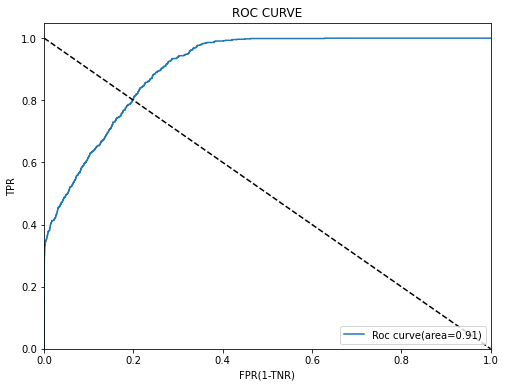

In [78]:
#invoking draw_roc_curve with the XGBOOST model
_ ,_ ,_ , _= roc(model_xgb,x_test,y_test)


as we can see LightGBM model after applyimg Maxabs sclar is more baised towards employee not getting promoted it gets failed in terms of employees gets promoted although model accuracy is 91% this proble can be solved using SMOTE technique.

Model with Accuracy
A)Before scaling:
1)XGBoost:94%
2)CatBoost:94%
3)LightGBM:94%

B)After scaling:
B.1)using MinMax scaler
1)XGBoost:94%
2)CatBoost:94%
3)LightGBM:94%

B.2)Using Robust scaler
1)XGBoost:94%
2)CatBoost:94%
3)LightGBM:94%

B.3)Using MaxAbs scalar
1)XGBoost:94%
2)CatBoost:94%
3)LightGBM:91%

#  Recommendations to improve the employee performance based on insights from analysis.

From the analysis we found out that, The Variables like KPIs_met >80%	, awards_won?, avg_training_score, are more related to the performance ratings, So company need to focus on

Conclusion For this project, we used scaling various scaling technique such as MinMax scaler,Robust Scaler,MaxAbs scaler and algorithms like XGBoost,CatBoost,LightGBM ,Logistic Regression  to calculate the accuracy and found out that all of algorithm  gives the sa,e accuracy of  94%.